# PCR Model

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn import model_selection

In [2]:
data_file = "Hitters.csv"

In [3]:
df = pd.read_csv(data_file).dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
x64 = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
y = df["Salary"]
dummies = pd.get_dummies(df[["League", "Division", "NewLeague"]])
X = pd.concat([x64, dummies[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3232)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", y_train.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (210, 19)
X_test shape:  (53, 19)
Y_train shape:  (210,)
Y_test shape:  (53,)


In [9]:
pca = PCA()

In [11]:
X_train_reduced = pca.fit_transform(scale(X_train))
pcr_model = LinearRegression().fit(X_train_reduced, y_train)
print(pcr_model.intercept_)
print(pcr_model.coef_)

539.8660999999998
[ 104.90381022   14.11279465   25.2355257   -32.97287438  -75.89315308
   42.03404371   15.49965903   32.04667684    1.99304228  141.37960018
  -17.07934155   22.81047759 -115.94827454 -217.90917551 -186.30316541
  500.0960806   469.13959848  787.60651547 1152.92289231]


# Tahmin

In [14]:
y_pred = pcr_model.predict(X_train_reduced)
np.sqrt(mean_squared_error(y_train, y_pred))

300.4068312115698

In [15]:
pca_2 = PCA()
X_test_reduced = pca_2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_test_reduced)
np.sqrt(mean_squared_error(y_test, y_pred))

372.35702780149313

# Model Tuning

In [16]:
pcr_model = LinearRegression().fit(X_train_reduced, y_train)
y_pred = pcr_model.predict(X_test_reduced)
np.sqrt(mean_squared_error(y_test, y_pred))

372.35702780149313

In [19]:
rmse = []
for i in np.arange(1, X_train_reduced.shape[1] + 1):
    rmse.append(np.sqrt(-1 * model_selection.cross_val_score(LinearRegression(), X_train_reduced[:, :i], y_train.ravel(), cv=model_selection.KFold(n_splits=10, shuffle=True, random_state=1), scoring="neg_mean_squared_error")).mean())

Text(0, 0.5, 'rmse')

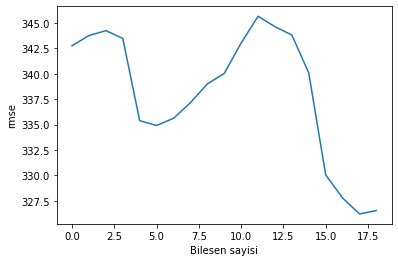

In [24]:
plt.plot(rmse)
plt.xlabel("Bilesen sayisi")
plt.ylabel("rmse")